# Multiple linear regression 

## Accessing the dataset

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
ipl=pd.read_csv('https://raw.githubusercontent.com/Foridur3210/IPL-Dataset-Player-price-prediction/master/IPL%20IMB381IPL2013.csv')

In [18]:
ipl

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


In [19]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [20]:
y=ipl['SOLD PRICE'] # Target
y

0        50000
1        50000
2       350000
3       850000
4       800000
        ...   
125     750000
126     225000
127    1800000
128     450000
129     110000
Name: SOLD PRICE, Length: 130, dtype: int64

In [21]:
# features

X= ipl.drop(['SOLD PRICE'], axis=1)
X

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,9.80,125.64,2,0,0,0.00,0.00,0.00,2010,50000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,3.00,42.85,0,0,0,0.00,0.00,0.00,2008,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,26.32,131.88,67,569,23,24.74,7.02,21.13,2011,400000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,9.90,91.67,1,1783,65,27.43,7.75,21.26,2008,200000


## Preprocessing

In [22]:
X.iloc[0:10,1:12]


,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL
0,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6
2,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8
4,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0
5,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.26,0,0.0
6,"Balaji, L",2,IND,CSK+,Bowler,51,27,120,78.94,34,42.5
7,"Bollinger, DE",2,AUS,CSK,Bowler,54,50,50,92.59,62,31.3
8,"Botha, J",2,SA,RR,Allrounder,83,17,609,85.77,72,53.0
9,"Boucher, MV",2,SA,RCB+,W. Keeper,5515,1,4686,84.76,0,0.0


In [23]:
X.iloc[0:10,12:]


,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE
0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000
1,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000
2,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000
3,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000
4,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000
5,1,63,48,21.00,95.45,0,0,0,0.00,0.00,0.00,2009,50000
6,0,26,15,4.33,72.22,1,1342,52,25.81,7.98,19.40,2011,100000
7,0,21,16,21.00,165.88,1,693,37,18.73,7.22,15.57,2011,200000
8,1,335,67,30.45,114.73,3,610,19,32.11,6.85,28.11,2011,200000
9,1,394,50,28.14,127.51,13,0,0,0.00,0.00,0.00,2008,200000


In [24]:
X=X.drop(['PLAYER NAME'], axis=1)
X

,Sl.NO.,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE
0,1,2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000
1,2,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000
2,3,2,IND,KKR,Bowler,571,58,1269,80.62,288,...,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000
3,4,1,IND,CSK,Bowler,284,31,241,84.56,51,...,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000
4,5,2,IND,CSK,Batsman,63,0,79,45.93,0,...,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,2,IND,DC,Batsman,0,0,0,0.00,0,...,9.80,125.64,2,0,0,0.00,0.00,0.00,2010,50000
126,127,2,PAK,RR,Batsman,6398,7,6814,75.78,3,...,3.00,42.85,0,0,0,0.00,0.00,0.00,2008,225000
127,128,2,IND,KXIP+,Batsman,1775,9,8051,87.58,109,...,26.32,131.88,67,569,23,24.74,7.02,21.13,2011,400000
128,129,2,IND,MI+,Bowler,1114,288,790,73.55,278,...,9.90,91.67,1,1783,65,27.43,7.75,21.26,2008,200000


In [25]:
X=X.drop(['Sl.NO.'], axis=1)
X

,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,...,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE
0,2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,...,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000
1,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,...,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000
2,2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,...,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000
3,1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,...,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000
4,2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,...,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2,IND,DC,Batsman,0,0,0,0.00,0,0.0,...,9.80,125.64,2,0,0,0.00,0.00,0.00,2010,50000
126,2,PAK,RR,Batsman,6398,7,6814,75.78,3,86.6,...,3.00,42.85,0,0,0,0.00,0.00,0.00,2008,225000
127,2,IND,KXIP+,Batsman,1775,9,8051,87.58,109,44.3,...,26.32,131.88,67,569,23,24.74,7.02,21.13,2011,400000
128,2,IND,MI+,Bowler,1114,288,790,73.55,278,35.4,...,9.90,91.67,1,1783,65,27.43,7.75,21.26,2008,200000


In [27]:
X['AGE'].unique()

array([2, 1, 3])

In [28]:
X['COUNTRY'].unique()

array(['SA', 'BAN', 'IND', 'AUS', 'WI', 'SL', 'NZ', 'ENG', 'PAK', 'ZIM'],
      dtype=object)

In [29]:
X['TEAM'].unique()

array(['KXIP', 'RCB', 'KKR', 'CSK', 'CSK+', 'RR', 'RCB+', 'MI+', 'DD+',
       'KKR+', 'DC', 'MI', 'DC+', 'RR+', 'KXIP+', 'KXI+', 'DD'],
      dtype=object)

In [30]:
X['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [31]:
X['CAPTAINCY EXP'].unique()

array([0, 1])

In [33]:
# Converting categorical to numeric using one hot encoding 

X_1=pd.get_dummies(X,columns=['AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'CAPTAINCY EXP'])

In [34]:
X_1

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,...,TEAM_RCB,TEAM_RCB+,TEAM_RR,TEAM_RR+,PLAYING ROLE_Allrounder,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_0,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,...,0,0,0,0,1,0,0,0,1,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,...,1,0,0,0,0,0,1,0,1,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,...,0,0,0,0,0,0,1,0,1,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,...,0,0,0,0,0,0,1,0,1,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.80,125.64,...,0,0,0,0,0,1,0,0,1,0
126,6398,7,6814,75.78,3,86.6,3,3,3.00,42.85,...,0,0,1,0,0,1,0,0,0,1
127,1775,9,8051,87.58,109,44.3,1237,66,26.32,131.88,...,0,0,0,0,0,1,0,0,0,1
128,1114,288,790,73.55,278,35.4,99,23,9.90,91.67,...,0,0,0,0,0,0,1,0,1,0


In [36]:
X_1.shape

(130, 54)

In [40]:
import statsmodels.api as sm
X_1 =sm.add_constant(X_1)
X_1

,const,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,...,TEAM_RCB,TEAM_RCB+,TEAM_RR,TEAM_RR+,PLAYING ROLE_Allrounder,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_0,CAPTAINCY EXP_1
0,1.0,0,0,0,0.00,0,0.0,0,0,0.00,...,0,0,0,0,1,0,0,0,1,0
1,1.0,214,18,657,71.41,185,37.6,0,0,0.00,...,1,0,0,0,0,0,1,0,1,0
2,1.0,571,58,1269,80.62,288,32.9,167,39,18.56,...,0,0,0,0,0,0,1,0,1,0
3,1.0,284,31,241,84.56,51,36.8,58,11,5.80,...,0,0,0,0,0,0,1,0,1,0
4,1.0,63,0,79,45.93,0,0.0,1317,71,32.93,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1.0,0,0,0,0.00,0,0.0,49,16,9.80,...,0,0,0,0,0,1,0,0,1,0
126,1.0,6398,7,6814,75.78,3,86.6,3,3,3.00,...,0,0,1,0,0,1,0,0,0,1
127,1.0,1775,9,8051,87.58,109,44.3,1237,66,26.32,...,0,0,0,0,0,1,0,0,0,1
128,1.0,1114,288,790,73.55,278,35.4,99,23,9.90,...,0,0,0,0,0,0,1,0,1,0


## Spltting to train and test

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_1,y,test_size=0.2,random_state=10)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((104, 55), (26, 55), (104,), (26,))

In [44]:
X_train

,const,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,...,TEAM_RCB,TEAM_RCB+,TEAM_RR,TEAM_RR+,PLAYING ROLE_Allrounder,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_0,CAPTAINCY EXP_1
19,1.0,654,11,2536,84.00,25,47.6,978,74,36.22,...,0,0,0,0,0,1,0,0,1,0
14,1.0,0,0,69,56.09,0,0.0,1540,95,31.43,...,0,0,0,0,0,1,0,0,1,0
91,1.0,9382,0,10472,75.75,0,0.0,1567,94,27.98,...,0,0,0,0,0,0,0,1,0,1
35,1.0,503,0,575,87.51,1,66.0,1006,73,31.44,...,0,0,0,0,0,1,0,0,1,0
20,1.0,380,157,73,45.62,60,35.6,4,3,4.00,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1.0,392,43,5,27.77,19,40.1,186,31,10.94,...,0,0,0,0,0,0,1,0,1,0
15,1.0,3509,0,6773,88.19,1,12.0,1782,70,37.13,...,0,0,0,0,0,0,0,1,0,1
100,1.0,537,1,1587,70.40,1,42.0,40,23,20.00,...,0,0,0,0,0,1,0,0,1,0
125,1.0,0,0,0,0.00,0,0.0,49,16,9.80,...,0,0,0,0,0,1,0,0,1,0


In [45]:
y_test

105     625000
96      225000
41      975000
128     450000
116     800000
59      950000
53      140000
63      100000
45      150000
39      950000
2       350000
47      525000
121     475000
52      500000
38      250000
1        50000
84      550000
56      225000
10      200000
58      100000
83     1550000
102     100000
43      675000
70      650000
26      800000
48      425000
Name: SOLD PRICE, dtype: int64

## Building the model

In [47]:
mlr_1=sm.OLS(y_train, X_train)

In [48]:
mlr_1=mlr_1.fit()

## Dignosing the model

In [49]:
mlr_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Ordinary least squares
================================================================================================
Model:                         OLS                       Adj. R-squared:              0.432     
Dependent Variable:            SOLD PRICE                AIC:                         2960.5765 
Date:                          2022-10-06 13:48          BIC:                         3090.1516 
No. Observations:              104                       Log-Likelihood:              -1431.3   
Df Model:                      48                        F-statistic:                 2.635     
Df Residuals:                  55                        Prob (F-statistic):          0.000302  
R-squared:                     0.697                     Scale:                       9.9553e+10
------------------------------------------------------------------------------------------------
                            Coef.         Std.Err.      t    P>|t|      [0.025         0.975]   
------------------------------------------------------------------------------------------------
const                   -31511395.7722 27928429.7326 -1.1283 0.2641 -87481219.6420 24458428.0975
T-RUNS                        -30.3782       30.6350 -0.9916 0.3257       -91.7722       31.0158
T-WKTS                       -806.7005      695.9658 -1.1591 0.2514     -2201.4472      588.0462
ODI-RUNS-S                     16.4956       32.7106  0.5043 0.6161       -49.0579       82.0491
ODI-SR-B                     -733.5392     1739.8618 -0.4216 0.6750     -4220.3002     2753.2218
ODI-WKTS                     1659.2951      990.4266  1.6753 0.0995      -325.5642     3644.1544
ODI-SR-BL                    -903.3921     2074.1469 -0.4355 0.6649     -5060.0754     3253.2911
RUNS-S                        179.2043      184.3843  0.9719 0.3354      -190.3100      548.7186
HS                          -3931.0622     3106.5964 -1.2654 0.2111    -10156.8205     2294.6960
AVE                         13125.3823    10820.1184  1.2131 0.2303     -8558.6194    34809.3841
SR-B                         -457.9334     1457.2570 -0.3142 0.7545     -3378.3416     2462.4748
SIXERS                       3443.5119     4012.8467  0.8581 0.3945     -4598.4126    11485.4364
RUNS-C                         89.8222      306.0528  0.2935 0.7703      -523.5214      703.1658
WKTS                         1913.8544     7624.6366  0.2510 0.8027    -13366.2589    17193.9676
AVE-BL                      15070.7979    12316.7215  1.2236 0.2263     -9612.4635    39754.0592
ECON                        -3224.7919    11520.8968 -0.2799 0.7806    -26313.1851    19863.6012
SR-BL                      -22024.3268    16894.1893 -1.3037 0.1978    -55881.0387    11832.3851
AUCTION YEAR                35422.0934    31319.2518  1.1310 0.2630    -27343.0897    98187.2766
BASE PRICE                      1.2271        0.7232  1.6969 0.0954        -0.2221        2.6764
AGE_1                   -10348291.1795  9316881.1304 -1.1107 0.2715 -29019738.1915  8323155.8326
AGE_2                   -10538034.8918  9312462.9194 -1.1316 0.2627 -29200627.6113  8124557.8278
AGE_3                   -10625069.7010  9300254.3140 -1.1424 0.2582 -29263195.8286  8013056.4265
COUNTRY_AUS              -3503218.2061  3131134.5389 -1.1188 0.2681  -9778152.0399  2771715.6276
COUNTRY_BAN                     0.0000        0.0000  1.1274 0.2645        -0.0000        0.0000
COUNTRY_ENG              -3518912.0328  3227349.5597 -1.0903 0.2803  -9986665.0770  2948841.0113
COUNTRY_IND              -3317844.9973  3133421.3168 -1.0589 0.2943  -9597361.6365  2961671.6418
COUNTRY_NZ               -3312257.4850  3097571.6137 -1.0693 0.2896  -9519929.7136  2895414.7436
COUNTRY_PAK              -3702378.2005  3047638.7252 -1.2148 0.2296  -9809982.6846  2405226.2836
COUNTRY_SA               -3421677.8480  3110920.1518 -1.0999 0.2762  -9656101.1448  2812745.4488
COUNTRY

## Multycollinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
def var_inf_factor(data):
    vif=pd.DataFrame()
    vif['Feature']=data.columns
    vif['VIF_Value']=[variance_inflation_factor(data.values, i) for i in range (data.shape[1])]
    print(vif)

In [67]:
# calling the function

var_inf_factor(X_1)

                    Feature  VIF_Value
0                     const   0.000000
1                    T-RUNS  10.050958
2                    T-WKTS   7.913130
3                ODI-RUNS-S  12.281835
4                  ODI-SR-B   1.945685
5                  ODI-WKTS  10.059551
6                 ODI-SR-BL   1.959773
7                    RUNS-S  11.190051
8                        HS  10.509568
9                       AVE  11.002625
10                     SR-B   2.892252
11                   SIXERS   7.179190
12                   RUNS-C  27.937638
13                     WKTS  27.067195
14                   AVE-BL  58.351438
15                     ECON   3.557460
16                    SR-BL  56.645367
17             AUCTION YEAR   1.724939
18               BASE PRICE   4.076253
19                    AGE_1        inf
20                    AGE_2        inf
21                    AGE_3        inf
22              COUNTRY_AUS        inf
23              COUNTRY_BAN        inf
24              COUNTRY_E

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


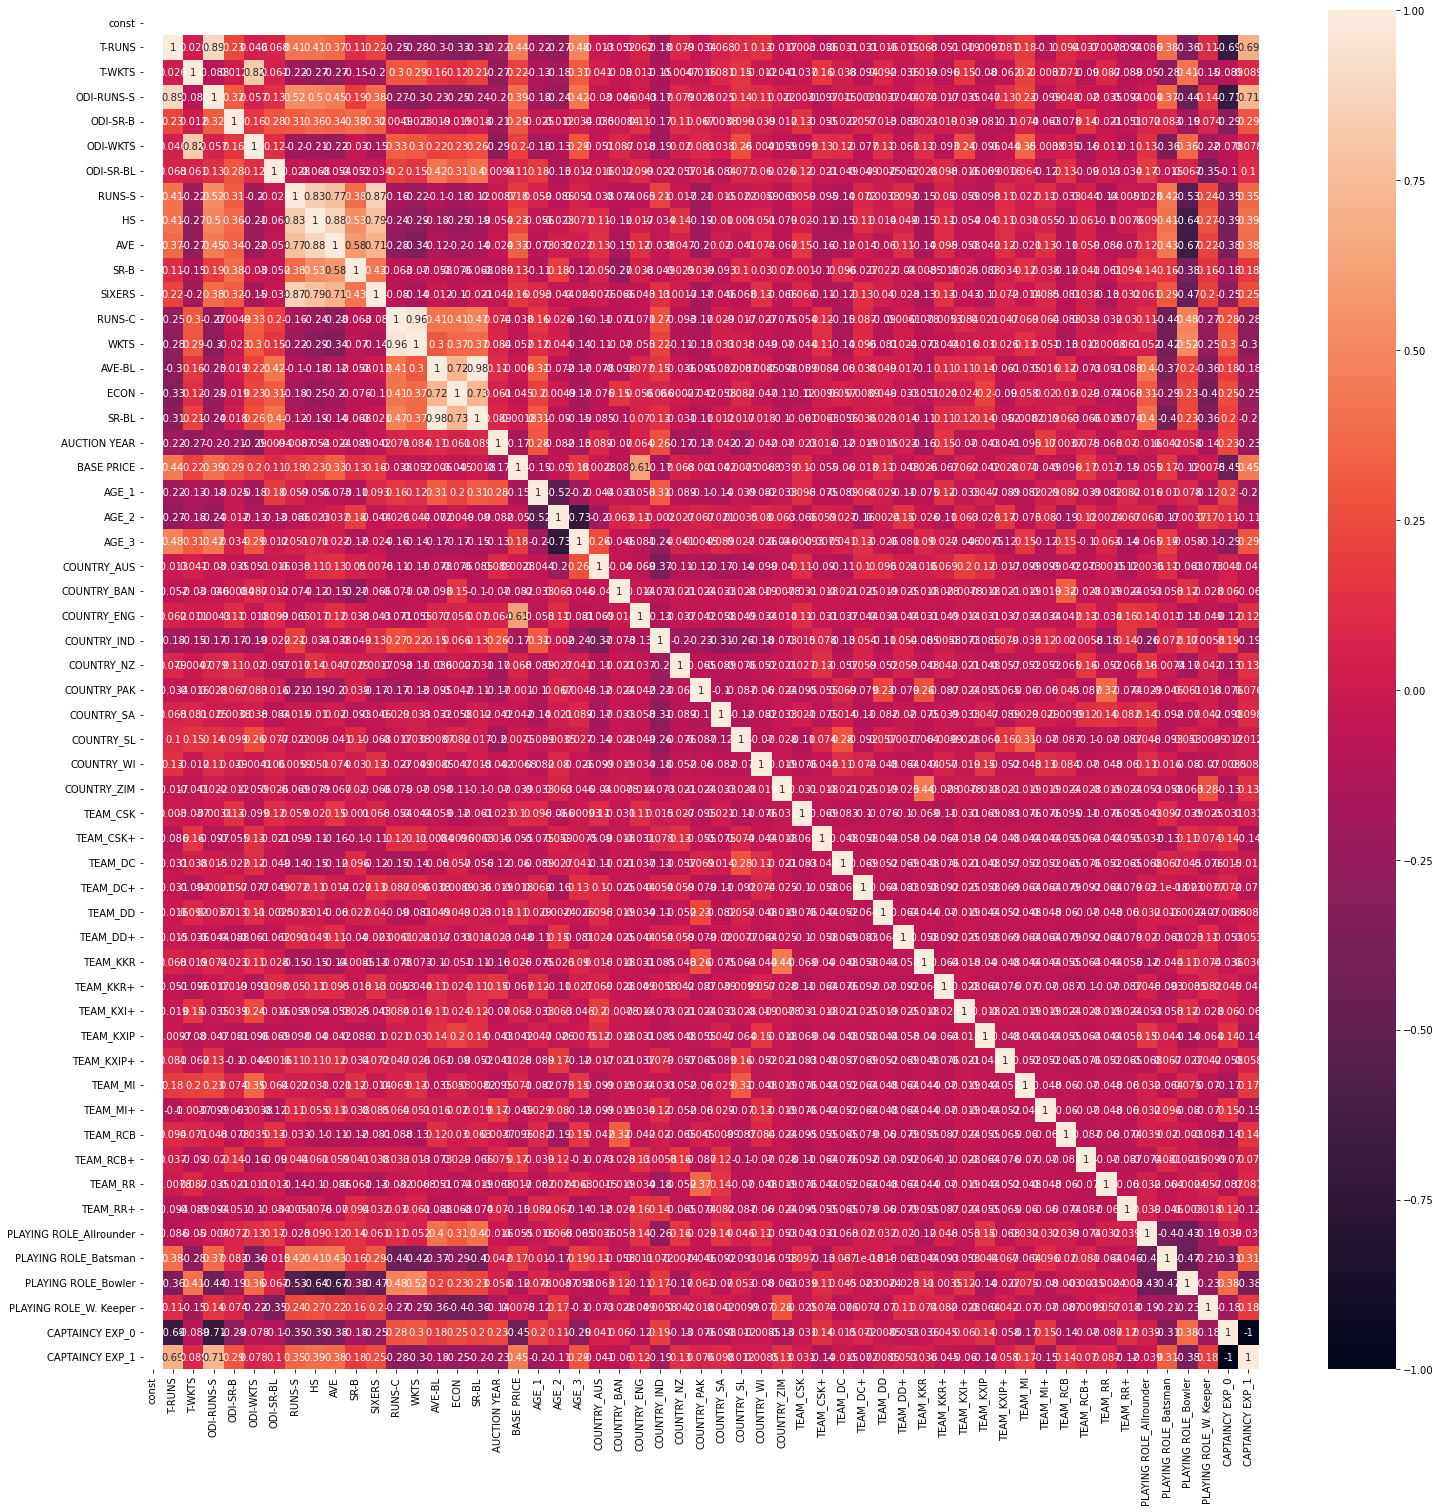

In [72]:
plt.figure(figsize=(25,25))
sns.heatmap(X_1.corr(),annot=True);